In [1]:
import os

# Replace the path with the new one
data_path = "D:/Anaconda/Multi-Modal-RAG-Pipeline-on-Images-and-Text-Locally/"

image_metadata_dict = {}

# Iterate over the files in the directory specified by data_path
for file in os.listdir(data_path):
    if file.endswith(".txt"):  # Check if the file ends with .txt
        filename = file
        # Replace the .txt extension with .jpg to find the corresponding image
        img_path = data_path + file.replace(".txt", ".jpg")
        if os.path.exists(img_path):  # Check if the .jpg image exists
            image_metadata_dict[len(image_metadata_dict)] = {
                "filename": filename,
                "img_path": img_path
            }
        else:
            # Replace the .txt extension with .png to find the corresponding image
            img_path = data_path + file.replace(".txt", ".png")
            if os.path.exists(img_path):  # Check if the .png image exists
                image_metadata_dict[len(image_metadata_dict)] = {
                    "filename": filename,
                    "img_path": img_path
                }

# Print the dictionary containing metadata about images
print(image_metadata_dict)


{0: {'filename': 'ai.txt', 'img_path': 'D:/Anaconda/Multi-Modal-RAG-Pipeline-on-Images-and-Text-Locally/ai.png'}, 1: {'filename': 'Naim.txt', 'img_path': 'D:/Anaconda/Multi-Modal-RAG-Pipeline-on-Images-and-Text-Locally/Naim.png'}, 2: {'filename': 'space.txt', 'img_path': 'D:/Anaconda/Multi-Modal-RAG-Pipeline-on-Images-and-Text-Locally/space.png'}}


In [2]:
import qdrant_client
from llama_index.core import SimpleDirectoryReader
from llama_index.vector_stores.qdrant import QdrantVectorStore
from llama_index.core import VectorStoreIndex, StorageContext
from llama_index.core.indices import MultiModalVectorStoreIndex

# Create a local Qdrant vector store
client = qdrant_client.QdrantClient(path="qdrant_d_0")

text_store = QdrantVectorStore(
    client=client, collection_name="text_collection_0"
)
image_store = QdrantVectorStore(
    client=client, collection_name="image_collection_0"
)
storage_context = StorageContext.from_defaults(
    vector_store=text_store, image_store=image_store
)

# Create the MultiModal index
documents = SimpleDirectoryReader(data_path).load_data()
index = MultiModalVectorStoreIndex.from_documents(
    documents,
    storage_context=storage_context,
)

d:\Anaconda\envs\multirag\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


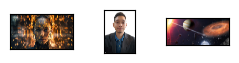

In [3]:
from PIL import Image
import matplotlib.pyplot as plt
import os


def plot_images(image_metadata_dict):
    original_images_urls = []
    images_shown = 0
    for image_id in image_metadata_dict:
        img_path = image_metadata_dict[image_id]["img_path"]
        if os.path.isfile(img_path):
            filename = image_metadata_dict[image_id]["filename"]
            image = Image.open(img_path).convert("RGB")

            plt.subplot(8, 8, len(original_images_urls) + 1)
            plt.imshow(image)
            plt.xticks([])
            plt.yticks([])

            original_images_urls.append(filename)
            images_shown += 1
            if images_shown >= 64:
                break

    plt.tight_layout()


plot_images(image_metadata_dict)

In [4]:
#Build a separate CLIP image embedding index under a differnt collection wikipedia_img
def plot_images(image_paths):
    images_shown = 0
    plt.figure(figsize=(16, 9))
    for img_path in image_paths:
        if os.path.isfile(img_path):
            image = Image.open(img_path)

            plt.subplot(2, 3, images_shown + 1)
            plt.imshow(image)
            plt.xticks([])
            plt.yticks([])

            images_shown += 1
            if images_shown >= 9:
                break

**Node ID:** a542ac84-a3f5-44b1-a8ef-0862addd96bc<br>**Similarity:** 0.759834768659225<br>**Text:** ({FRvB	-Imɯ0'\ @-X4R8"C$o`-sji"ܽ:7?EI_JMLN0SȌ{Z鱦=]kKktu#yO!m]|Ni|l!bCY&#iH#JAw
r?O\"[ ح6x+9|A]|X1.+fj̙i:N_o|Xf0³H1rYPJڳk[S@ k	ݰ<< '&/.OZu$JsG+|X[O5˗洬W۽?Sp8v^˳G|[...<br>

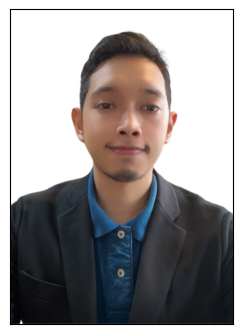

In [5]:
from llama_index.core.response.notebook_utils import display_source_node
from llama_index.core.schema import ImageNode
    
test_query = "Who is Naim?"
# generate  retrieval results
retriever = index.as_retriever(similarity_top_k=1, image_similarity_top_k=1)
retrieval_results = retriever.retrieve(test_query)

retrieved_image = []
for res_node in retrieval_results:
    if isinstance(res_node.node, ImageNode):
        retrieved_image.append(res_node.node.metadata["file_path"])
    else:
        display_source_node(res_node, source_length=200)

plot_images(retrieved_image)

**Node ID:** 3e4adef2-bd6f-42a9-b6ce-44fcea321132<br>**Similarity:** 0.8504995597048776<br>**Text:** What is AI? A Beginner’s Guide to Artificial Intelligence (2024)
Last Updated on February 14, 2024 by Deanna McLean 2 Comments

Editorial Note: We may earn a commission when you visit links on o...<br>

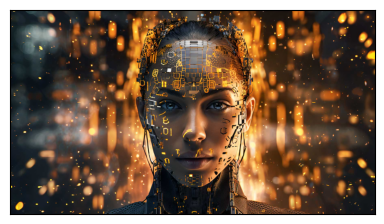

In [8]:
test_query = "What is Ai?"
# generate  retrieval results
retriever = index.as_retriever(similarity_top_k=1, image_similarity_top_k=1)
retrieval_results = retriever.retrieve(test_query)

retrieved_image = []
for res_node in retrieval_results:
    if isinstance(res_node.node, ImageNode):
        retrieved_image.append(res_node.node.metadata["file_path"])
    else:
        display_source_node(res_node, source_length=200)

plot_images(retrieved_image)

**Node ID:** ee4e888f-f8a4-40de-829b-28b0765cbfbd<br>**Similarity:** 0.8358388380623591<br>**Text:** There is more water in space than you might think.

There is gravity on the International Space Station
There is gravity on the International Space Station
Fresh fruit is always a welcome treat...<br>

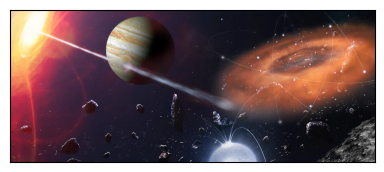

In [9]:
test_query = "Where is space?"
# generate  retrieval results
retriever = index.as_retriever(similarity_top_k=1, image_similarity_top_k=1)
retrieval_results = retriever.retrieve(test_query)

retrieved_image = []
for res_node in retrieval_results:
    if isinstance(res_node.node, ImageNode):
        retrieved_image.append(res_node.node.metadata["file_path"])
    else:
        display_source_node(res_node, source_length=200)

plot_images(retrieved_image)